In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table

#Measurement reference
Measurement = Base.classes.measurement

#Station measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#observe columns in class with dir()
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date= dt.date(2017, 8, 23)
most_recent_date

datetime.date(2017, 8, 23)

In [12]:
# Calculate the date one year from the last date in data set.
year_prior= most_recent_date - dt.timedelta(days=365)
year_prior

datetime.date(2016, 8, 23)

In [13]:
# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.prcp, 
                        Measurement.date)\
                  .filter(Measurement.date > year_prior)\
                    .filter(Measurement.prcp != None).all()      #!= None  is sqlAlchemy equivalent to notnull()

#print list to observe for list comprehension
#results

# List comprehension solution
prcp_rows = [{"Date": result[1], "Precipitation": result[0]} for result in results]
prcp_rows

[{'Date': '2016-08-24', 'Precipitation': 0.08},
 {'Date': '2016-08-25', 'Precipitation': 0.08},
 {'Date': '2016-08-26', 'Precipitation': 0.0},
 {'Date': '2016-08-27', 'Precipitation': 0.0},
 {'Date': '2016-08-28', 'Precipitation': 0.01},
 {'Date': '2016-08-29', 'Precipitation': 0.0},
 {'Date': '2016-08-30', 'Precipitation': 0.0},
 {'Date': '2016-08-31', 'Precipitation': 0.13},
 {'Date': '2016-09-01', 'Precipitation': 0.0},
 {'Date': '2016-09-02', 'Precipitation': 0.0},
 {'Date': '2016-09-03', 'Precipitation': 0.0},
 {'Date': '2016-09-04', 'Precipitation': 0.03},
 {'Date': '2016-09-07', 'Precipitation': 0.05},
 {'Date': '2016-09-08', 'Precipitation': 0.0},
 {'Date': '2016-09-09', 'Precipitation': 0.03},
 {'Date': '2016-09-10', 'Precipitation': 0.0},
 {'Date': '2016-09-11', 'Precipitation': 0.05},
 {'Date': '2016-09-12', 'Precipitation': 0.0},
 {'Date': '2016-09-13', 'Precipitation': 0.02},
 {'Date': '2016-09-14', 'Precipitation': 1.32},
 {'Date': '2016-09-15', 'Precipitation': 0.42},
 {

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df= pd.DataFrame(prcp_rows).set_index("Date")
prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


In [15]:
# Sort the dataframe by date

master_prcp_df= prcp_df.sort_values(by= 'Date')
master_prcp_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


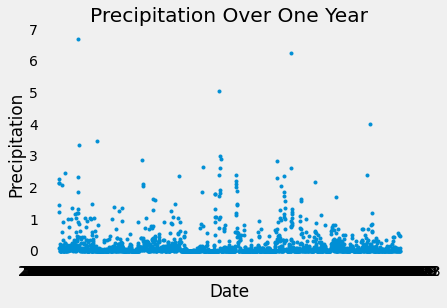

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

fig1, ax1 = plt.subplots()

x_date= master_prcp_df.index
y_precipitation= master_prcp_df['Precipitation']

ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation')
ax1.set_title('Precipitation Over One Year')

ax1.plot(x_date, y_precipitation, '.')


# Set a grid on the plot
plt.grid()

plt.show()


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [18]:
# Observe Station 

dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)


# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station).label('Station Activity'))\
    .group_by(Measurement.station)\
    .order_by(desc('Station Activity')).all()
                                                         


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


# 



In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [23]:
# Close Session
session.close()